In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
numeric_col=data.select_dtypes(include='number')

In [7]:
from scipy import stats
z_scores=stats.zscore(numeric_col)

In [8]:
data_clean= data[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

In [9]:
data_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
print(data.shape)
print(data_clean.shape)

(918, 12)
(899, 12)


In [11]:
obj_col=data_clean.select_dtypes(include='object')
print(obj_col)

    Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[899 rows x 5 columns]


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
data_encoding=pd.get_dummies(data_clean,columns=obj_col.columns)

In [14]:
data_encoding.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [15]:
x=data_encoding.drop('HeartDisease',axis=1)
y=data_encoding.HeartDisease

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled

array([[ 1.53645907, -0.83274034,  0.70669109, ..., -0.26143961,
        -1.0097836 ,  1.14863172],
       [-0.57904087, -0.01542713,  0.16715456, ..., -0.26143961,
         0.99031119, -0.87060106],
       [ 1.11335908, -0.13218616,  0.95279547, ..., -0.26143961,
         0.99031119, -0.87060106],
       ...,
       [-0.47326588, -0.13218616,  0.60257   , ..., -0.26143961,
        -1.0097836 ,  1.14863172],
       [ 0.2671591 , -0.71598131, -0.96871181, ..., -0.26143961,
         0.99031119, -0.87060106],
       [-1.42524085, -0.71598131,  2.49568062, ..., -0.26143961,
         0.99031119, -0.87060106]])

In [21]:
x_test_scaled=scaler.transform(x_test)
x_test_scaled

array([[ 1.00758408,  0.45160899, -1.91526713, ..., -0.26143961,
        -1.0097836 ,  1.14863172],
       [ 0.4787091 , -0.24894519,  0.12929235, ..., -0.26143961,
         0.99031119, -0.87060106],
       [-0.26171588, -0.42408374,  0.10089569, ..., -0.26143961,
        -1.0097836 ,  1.14863172],
       ...,
       [ 1.32490907,  0.45160899, -0.59955524, ..., -0.26143961,
         0.99031119, -0.87060106],
       [-1.74256584, -0.13218616,  0.08196458, ..., -0.26143961,
        -1.0097836 ,  1.14863172],
       [ 1.11335908, -2.17546919, -1.91526713, ...,  3.82497513,
        -1.0097836 , -0.87060106]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model_logisticRegreesion=LogisticRegression()
model_logisticRegreesion.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
score1=model_logisticRegreesion.score(x_test_scaled,y_test)
print(score1)

0.8833333333333333


In [25]:
y_pred1=model_logisticRegreesion.predict(x_test_scaled)

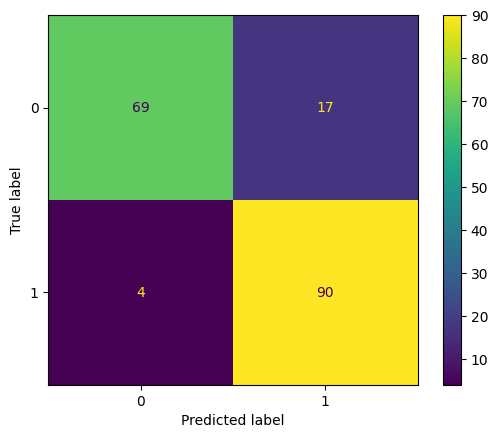

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

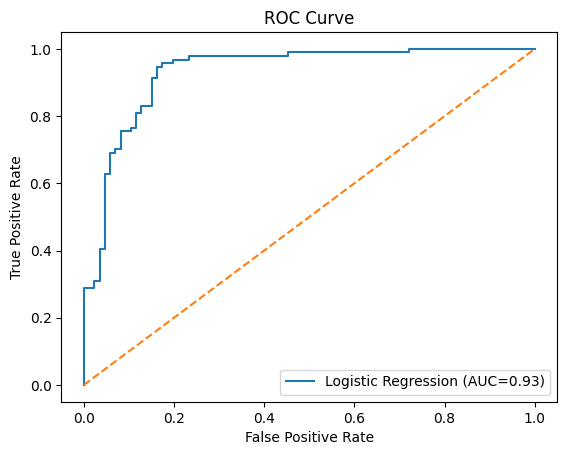

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_lr = model_logisticRegreesion.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={auc_lr:.2f})")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_RandomForest=RandomForestClassifier()
model_RandomForest.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [30]:
score2=model_RandomForest.score(x_test_scaled,y_test)
print(score2)

0.8833333333333333


In [31]:
y_pred2=model_RandomForest.predict(x_test_scaled)

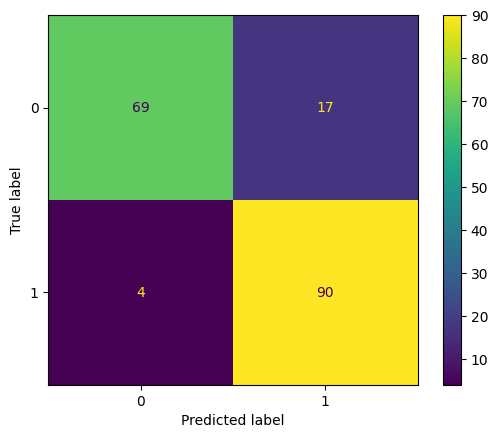

In [32]:
cm = confusion_matrix(y_test, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [33]:
from sklearn.svm import SVC
modelSvm = SVC(
    kernel='rbf',      # linear / rbf / poly
    C=1.0,
    gamma='scale',
    random_state=42
)

modelSvm.fit(x_train_scaled,y_train)

SVC(random_state=42)

In [34]:
score3=modelSvm.score(x_test_scaled,y_test)
print(score3)

0.8777777777777778


In [35]:
y_pred3=modelSvm.predict(x_test_scaled)

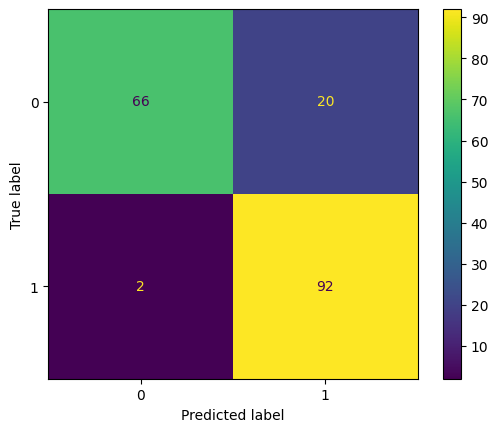

In [36]:
cm = confusion_matrix(y_test, y_pred3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

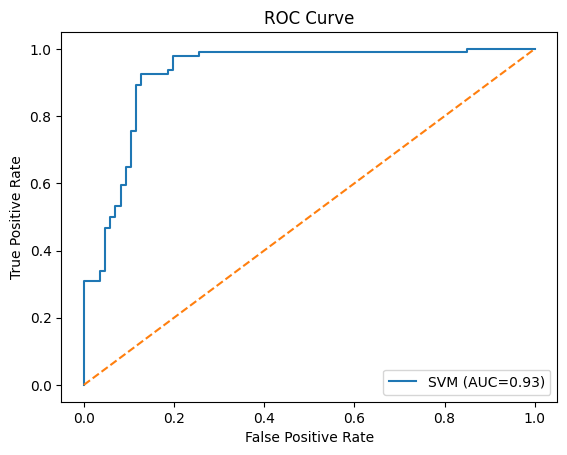

In [37]:
from sklearn.svm import SVC

modelSvm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

modelSvm.fit(x_train_scaled, y_train)

y_prob_svm = modelSvm.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.plot(fpr, tpr, label=f"SVM (AUC={auc_svm:.2f})")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [38]:
results=pd.DataFrame({
    'models':['LogisticRegression','RandomForest','SVM'],
    'scores':[score1,score2,score3]
})
results

,models,scores
0,LogisticRegression,0.883333
1,RandomForest,0.883333
2,SVM,0.877778


In [39]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
x_pca.shape

(899, 2)

In [40]:
pca.explained_variance_ratio_

array([0.92106286, 0.05065082])

In [41]:
pca.n_components_

np.int64(2)

In [42]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)

In [43]:
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train_pca, y_train)
score_LR=modelLR.score(X_test_pca, y_test)
score_LR

0.6666666666666666

In [44]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
scoreRF=model_rf.score(X_test_pca, y_test)
scoreRF

0.6444444444444445

In [45]:
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

model_svm.fit(X_train_pca, y_train)
score_SVM=model_svm.score(X_test_pca, y_test)
score_SVM

0.7277777777777777

In [46]:
results=pd.DataFrame({
    'models':['LogisticRegressionPCA','RandomForestPCA','SVMPCA'],
    'scores':[score_LR,scoreRF,score_SVM]
})
results

,models,scores
0,LogisticRegressionPCA,0.666667
1,RandomForestPCA,0.644444
2,SVMPCA,0.727778
